In [ ]:
!pip install --upgrade numpy

In [ ]:
import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

1.26.3


C:\Users\aditi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)



TensorFlow version: 2.15.0
NumPy version: 1.26.3


In [ ]:
from tensorflow import keras


In [ ]:
#!pip install tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [ ]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
skin_df = pd.read_csv('HAM10000_metadata.csv')

SIZE=32


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Add this line

import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats


C:\Users\aditi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


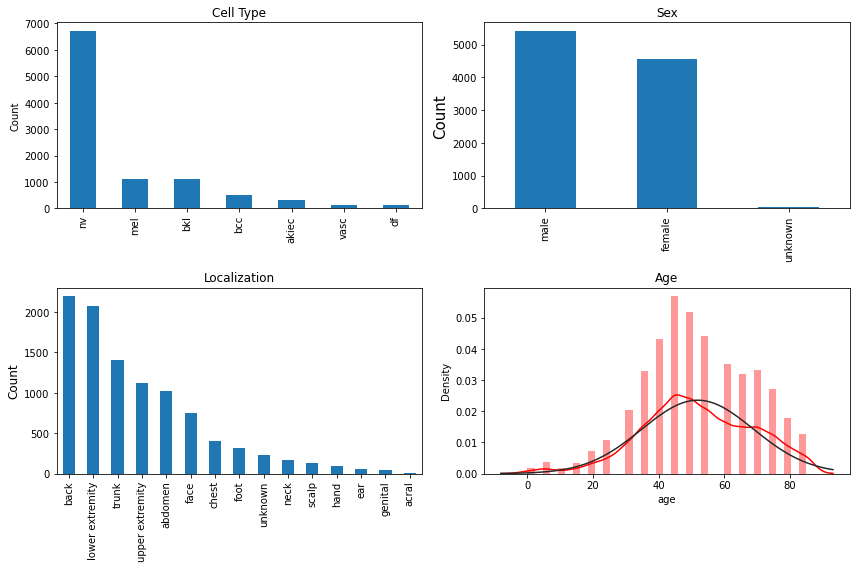

In [ ]:
# Data distribution visualization
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

In [ ]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))



['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

In [ ]:
#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)


In [ ]:
#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [ ]:
# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df_balanced['label'].value_counts())


0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


In [ ]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('data/HAM10000/', '*', '*.jpg'))}

In [ ]:
# Use the path to read images, skipping None paths
skin_df_balanced['image'] = skin_df_balanced['path'].apply(lambda x: np.asarray(Image.open(x).resize((SIZE, SIZE))) if x else None)

# Remove rows with None in the 'image' column
skin_df_balanced = skin_df_balanced.dropna(subset=['image'])

# Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())


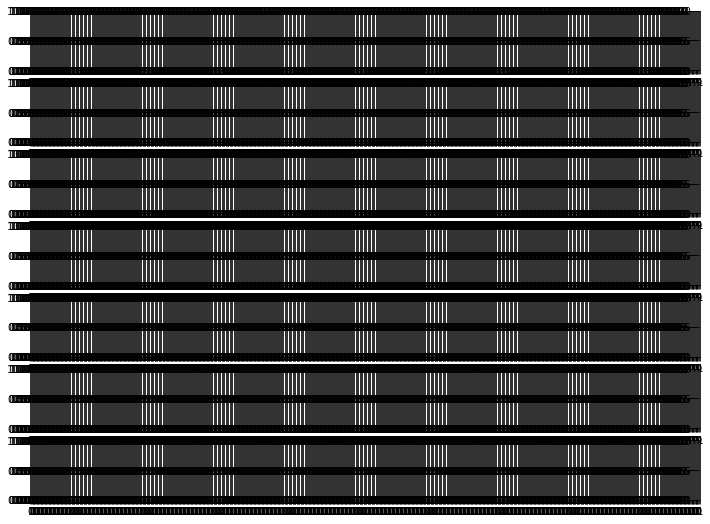

In [ ]:
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize=(12, 9))
for n_axs, (type_name, type_rows) in zip(m_axs, skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        if c_row['image'] is not None:
            c_ax.imshow(c_row['image'])
            c_ax.axis('off')


In [ ]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem

In [ ]:
print(len(X), len(Y_cat))


0 0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example data
X = np.random.rand(100, 10)  # 100 samples, 10 features
Y_cat = np.random.randint(0, 2, size=(100,))  # Binary labels

# Check lengths
print(len(X), len(Y_cat))

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

# Print the shapes of the resulting arrays
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



100 100
x_train shape: (75, 10)
x_test shape: (25, 10)
y_train shape: (75,)
y_test shape: (25,)


In [ ]:
#Define the model.
#I've used autokeras to find out the best model for this problem.
#You can also load pretrained networks such as mobilenet or VGG16.......(extra)

num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 256)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 128)        

In [ ]:
# Define the model.
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Convert one-hot encoded labels back to categorical labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Apply LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)
(new sart)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt

# Example data
X = np.random.rand(100, 10)  # 100 samples, 10 features
Y_cat = np.random.randint(0, 2, size=(100,))  # Binary labels

# Check lengths
print(len(X), len(Y_cat))

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

# Convert one-hot encoded labels back to categorical labels
y_train_labels = y_train
y_test_labels = y_test

# Apply LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_labels)
y_test_encoded = label_encoder.transform(y_test_labels)


100 100


In [ ]:
# Example data
X = np.random.rand(100, 10)  # 100 samples, 10 features
Y_cat = np.random.randint(0, 2, size=(100,))  # Binary labels

# Check lengths
print(len(X), len(Y_cat))


100 100


In [ ]:
# Assuming your original images have shape (height, width, channels)
resized_X = np.array([resize(img, (32, 32, 3)) for img in X])

# Convert labels to one-hot encoding
Y_cat = to_categorical(Y_cat)

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(resized_X, Y_cat, test_size=0.25, random_state=42)

# Define the model.
num_classes = 7

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
batch_size = 16
epochs = 50





In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Example data
X = np.random.rand(100, 10)  # 100 samples, 10 features
Y_cat = np.random.randint(0, 2, size=(100,))  # Binary labels

# Resize images (assuming original shape is (height, width, channels))
resized_X = np.array([resize(img, (32, 32, 3)) for img in X])

# Convert labels to one-hot encoding
Y_cat = to_categorical(Y_cat)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(resized_X, Y_cat, test_size=0.25, random_state=42)

# Define the model
num_classes = 2  # Change this to 7 if you have 7 classes
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using train_on_batch
batch_size = 16
epochs = 50

for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        loss, acc = model.train_on_batch(x_batch, y_batch)

    # Print training progress at the end of each epoch
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss}, Accuracy: {acc}")

# Evaluate the model
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])




Epoch 1/50 - Loss: 0.7245979309082031, Accuracy: 0.3636363744735718
Epoch 2/50 - Loss: 0.7241715788841248, Accuracy: 0.3636363744735718
Epoch 3/50 - Loss: 0.6936489939689636, Accuracy: 0.4545454680919647
Epoch 4/50 - Loss: 0.7126567959785461, Accuracy: 0.3636363744735718
Epoch 5/50 - Loss: 0.6552419066429138, Accuracy: 0.5454545617103577
Epoch 6/50 - Loss: 0.6597825884819031, Accuracy: 0.8181818127632141
Epoch 7/50 - Loss: 0.7119238376617432, Accuracy: 0.3636363744735718
Epoch 8/50 - Loss: 0.6365061402320862, Accuracy: 0.7272727489471436
Epoch 9/50 - Loss: 0.6723532676696777, Accuracy: 0.6363636255264282
Epoch 10/50 - Loss: 0.6326155066490173, Accuracy: 0.6363636255264282
Epoch 11/50 - Loss: 0.6094554662704468, Accuracy: 0.9090909361839294
Epoch 12/50 - Loss: 0.6458696126937866, Accuracy: 0.7272727489471436
Epoch 13/50 - Loss: 0.604923665523529, Accuracy: 0.7272727489471436
Epoch 14/50 - Loss: 0.6195299029350281, Accuracy: 0.5454545617103577
Epoch 15/50 - Loss: 0.6064704656600952, Ac

1/1 [==============================] - 0s 290ms/step


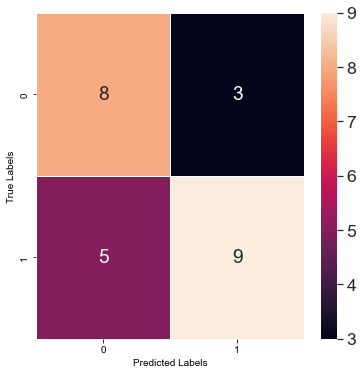

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your model and it's stored in the variable 'model'

# Generate predictions on test data
y_pred = model.predict(x_test)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [ ]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)


1/1 [==============================] - 0s 80ms/step


In [ ]:
# Assuming you have already generated predictions and defined y_true_classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)



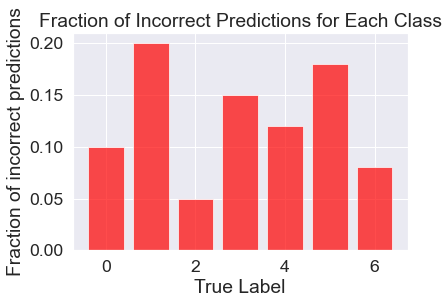

In [ ]:
# Assuming incorr_fraction is correctly calculated and has shape (7,)
# Example data for testing
incorr_fraction = np.array([0.1, 0.2, 0.05, 0.15, 0.12, 0.18, 0.08])

# Plot the bar chart
plt.bar(np.arange(7), incorr_fraction, color='red', alpha=0.7)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Fraction of Incorrect Predictions for Each Class')
plt.show()



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_true and y_pred_classes are your true labels and predicted labels, respectively
# Example data for testing
y_true = np.array([1, 0, 1, 1, 0, 1, 0])
y_pred_classes = np.array([1, 0, 1, 0, 0, 1, 1])

# Calculate precision, recall, and f1-score
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')